# Data Analysis Report of SapJam Topic "Blochchain"
Dataset file: 15000 articles crawled from SapJam by Python Scrapy and Splash

In [1]:
from sqlalchemy import create_engine, distinct
from sqlalchemy.orm import sessionmaker
from sqlalchemy.sql import func

from JamScrapy import config
from JamScrapy.preprocess.entity import Post, People, Group
from utility import plt_pie

In [2]:
KEYWORD = 'blockchain'

In [3]:
engine = create_engine(config.DB_CONNECT_STRING, max_overflow=5)
session = sessionmaker(bind=engine)()
results = engine.execute(f"SELECT * FROM spider_jam_post WHERE body IS NOT NULL AND keyword = '{KEYWORD}'")
print('Total posts:', results.rowcount)

Total posts: 15127


# Overview Jam Categories of Topic "ChatBot"

In [4]:
urls = []
for p in results:
    # get post baseurl
    urls.append(p.baseurl.replace('http://jam4.sapjam.com/','').split('/')[0])
    
#print(urls)

urls_set = set(urls)
pie = {}
for item in urls_set:
    pie[item] = urls.count(item)
    
print(len(pie))    
print(pie)

11
{'wiki': 637, 'groups': 12081, 'discussions': 72, 'profile': 57, 'ideas': 36, 'feed': 1070, 'questions': 82, 'blogs': 1071, 'poll': 8, 'articles': 6, 'tasks': 7}


Most posts from 'groups': 12081, including 'documents' of 'groups': 11464 (94.9%)

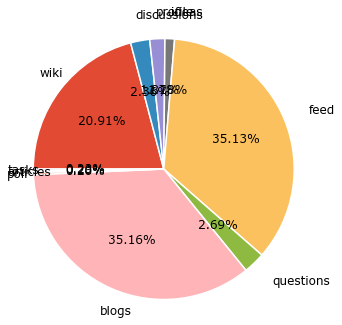

In [5]:
if 'groups' in pie:
    pie.pop('groups')
    
values = []
labels = []
for key in pie:
    if int(pie[key]) > 0:
        values.append(int(pie[key]))
        labels.append(key)
        
plt_pie(values, labels)

# Entity Extraction of People

In [6]:
engine = create_engine(config.DB_CONNECT_STRING, max_overflow=5)
session = sessionmaker(bind=engine)()
people = session.query(People).filter(People.keyword == KEYWORD).all()

print('total of', len(people), 'including 2 roles of [Creator] and [Participator]')

total of 33338 including 2 roles of [Creator] and [Participator]


## People perform as Creator

In [7]:
results = engine.execute(f'''select displayname, COUNT(displayname) as count from jam_people_from_post 
where roletype = 'creator' AND keyword = '{KEYWORD}' GROUP BY displayname order by count desc, displayname''').fetchall()
print('Distinct Creators:', len(results))

Distinct Creators: 3428


In [9]:
for r in results:
    if r[1] >= 30:
        print(r[0], ':', r[1])

Alumni : 912
Raik Kulinna : 347
Raimund Gross : 269
Nadine Hoffmann : 146
Susan Crawford : 137
Mathias Neid : 131
Joerg Fuetterer : 102
Birgit Dolny : 84
Emily Loggenberg : 82
Brent Potts : 76
Olena Vovk : 76
Benjamin Stoeckhert : 67
Tatiana Khorina : 67
Tamas Hevizi : 65
Ramona Gattner : 64
Roland Krijnen : 61
Geraldine Lim : 59
Kristin McMahon : 59
Tsugi Momoki : 54
Christina Frazier : 51
Harey Vigneswaran : 51
Soon Fuller : 50
Regina Mattukat : 49
Frances Roche : 48
Nam Ho Lee : 47
Sina Moser : 47
Timo Kirchner : 47
Gretchen Statler : 44
Jorge Granada : 42
Mike Fecek : 42
Solange Vega : 41
Ravinder Kibbe : 40
Ulrich Scholl : 39
Victoria Rochard : 39
Wolfgang Weiss : 39
Pandey Shi : 38
Maarten de Vries : 36
Frank Albrecht : 33
Dirk Kansky : 32
Jenny Hill : 32
Kathleen Gallo : 32
Rudi Meyfarth : 32
Dante Alipio Jr : 31
Frank Lingenberg : 31
Paul Boldra : 31
Petra Streng : 31
Susanna Havranek : 31
Brian McKellar : 30
Maren Wendt : 30


## People perform as Participator

In [10]:
results = engine.execute(f'''select displayname, COUNT(displayname) as count from jam_people_from_post 
where roletype = 'participator' AND position <> -1 AND keyword = '{KEYWORD}' GROUP BY displayname order by count desc, displayname''').fetchall()
print('Distinct Participators:', len(results))

Distinct Participators: 1527


In [13]:
for r in results:
    if r[1] >= 10:
        print(r[0], ':', r[1])

Alumni : 276
Raimund Gross : 180
Paul Boldra : 79
Nadine Hoffmann : 48
Brian McKellar : 46
Raik Kulinna : 42
Andreas Krompholz : 37
Georg Koester : 36
Benjamin Stoeckhert : 32
Olena Vovk : 32
Monika Eggers : 30
Attila Bueyuekcakir : 26
alesew Sewrjugin : 25
Kathleen O\'Brien : 24
Mandy Lin : 23
Tamas Hevizi : 23
Matthias Steiner : 22
Emily Loggenberg : 21
Alexis Luna : 20
Susanne-Kirsten Mueller : 20
Alex Gehres : 19
Dwayne DeSylvia : 18
Tracy Rodgers : 18
Theodora Kyratsous : 17
Uwe Erdtmann : 17
Christopher Fries : 16
Jeanne Carboni : 16
Mathias Held : 16
Deverick McIntyre : 15
Eva Walter : 15
Jay Thoden van Velzen : 15
Katharina Reichert : 15
Maarten de Vries : 15
Nitin Verma : 15
Thomas Steinmetz : 15
Ulrich Scholl : 15
Benno Eberle : 14
Wilson Rothschild : 14
Felipe Arroyo Ivancic : 13
Jinesh Krishnan : 13
Marlyn Zelkowitz : 13
Tiffany Monahan : 13
Carmen Kimberling : 12
Frank Lingenberg : 12
Melissa Rittenhouse : 12
Rajprasath Subramanian : 12
Simon Cummings : 12
Stefanie Simson 

# Entity Extraction of Group

In [14]:
#groups = session.query(distinct(Group.groupname).label('groupname')).order_by(Group.membercount.desc()).all()
results = engine.execute(f"select distinct groupname, membercount from jam_group_from_post where keyword = '{KEYWORD}' order by membercount desc").fetchall()
print('Total Group:', len(results))

Total Group: 165


In [16]:
for r in results:
    if r[1] >= 10:
        print(r[0], ':', r[1])

SAP d<kom> 2018 : 10999
SAP.iO Intrapreneurship // Run Your Idea : 7090
Blockchain : 5142
Blockchain : 5140
SAP Leonardo Overview Jam : 4938
SAP Marketing Community : 4487
S/4HANA Cloud (S4HC) : 4403
FOCUS Driven Learning Framework : 4248
Presales Home Group : 4248
FOCUS Driven Learning Framework : 4246
P&I Training and Learning Newsletter : 3589
P&I Training and Learning Newsletter : 3586
SAP Leonardo Presales & Services : 2939
SAP Leonardo Presales & Services : 2937
Cloud & Platform Technology Solution Hub : 2723
Women in Technology@SAP : 2652
SAP Hybris Solution Hub : 2646
BTS Business Transformation Services : 2470
SAP Innovation Center Network : 2353
SAP Digital Jam Group : 2195
SAP Digital Jam Group : 2193
HANA Product Management : 2183
Procurement Solution Hub : 2077
Planet Banking : 2076
Planet Utilities : 2036
SAP Cloud Business Group : 1950
Presales Solution Hubs : 1910
Presales Solution Hubs : 1909
P&I ICD – Industry and Customer Development : 1859
Strategic Customer Program

# Statistic of Posts

In [17]:
query = engine.execute(f"select count(id) as posts, sum(comments) as comments, sum(likes) as likes, sum(views) as views from jam_post where keyword = '{KEYWORD}'")
redundance_comments = engine.execute(f"select count(id) as count from jam_people_from_post where position = -1 AND keyword = '{KEYWORD}'")

In [18]:
statis = query.first()
print("total posts:", statis.posts)
print("total comments:", statis.comments-redundance_comments.first().count)
print("total likes:", statis.likes)
print("total views:", statis.views)

total posts: 13708
total comments: 956
total likes: 10082
total views: 1335439
